In [1]:
from google.colab import files
uploaded = files.upload()

Saving seattle_housing.csv to seattle_housing.csv


In [2]:
import os 
os.listdir()

['.config', 'seattle_housing.csv', 'sample_data']

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#1. 데이터 로드

In [4]:
seattle_housing = pd.read_csv('./seattle_housing.csv')
seattle_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

|               |                                        |            |               |
|---------------|----------------------------------------|------------|---------------|
| ID            |  집을 구분하는 번호                            |            |               |
| date          |  집을 구매한 날짜                             |            |               |
| price         |  집의 가격(Target variable)                |            |               |
| bedrooms      |  침실의 수                                 |            |               |
| bathrooms     |  화장실의 수                                |            |               |
| sqft_living   |  주거 공간의 평방 피트(면적)                      |            |               |
| sqft_lot      |  부지의 평방 피트(면적)                         |            |               |
| floors        |  집의 층 수                                |            |               |
| waterfront    |  집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)        |            |               |
| view          |  집이 얼마나 좋아 보이는지의 정도                    |            |               |
| condition     |  집의 전반적인 상태                            |            |               |
| grade         |  King County grading 시스템 기준으로 매긴 집의 등급 |            |               |
| sqft_above    |  지하실을 제외한 평방 피트(면적)                    |            |               |
| sqft_basement |  지하실의 평방 피트(면적)                        |            |               |
| yr_built      |  지어진 년도                                |            |               |
| yr_renovated  |  집을 재건축한 년도                            |            |               |
| zipcode       |  우편번호                                  |            |               |
| lat           |  위도                                    |            |               |
| long          |  경도                                    |            |               |
| sqft_living15 |  2015년 기준 주거 공간의 평방 피트(면적              집을 재건축했다면 변화가 있을 수 있음) |
| sqft_lot15    |  2015년 기준 부지의 평방 피트(면적                 집을 재건축했다면 변화가 있을 수 있음) 

- bathroom:세면대, 변기, 샤워기, 욕조 하나당 (0.25)

In [5]:
housing = seattle_housing.copy()

In [6]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [8]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,7517.000000,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,4340.374984,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,7517.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,11275.500000,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,15034.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3606d6bb70>,
      dtype=object)

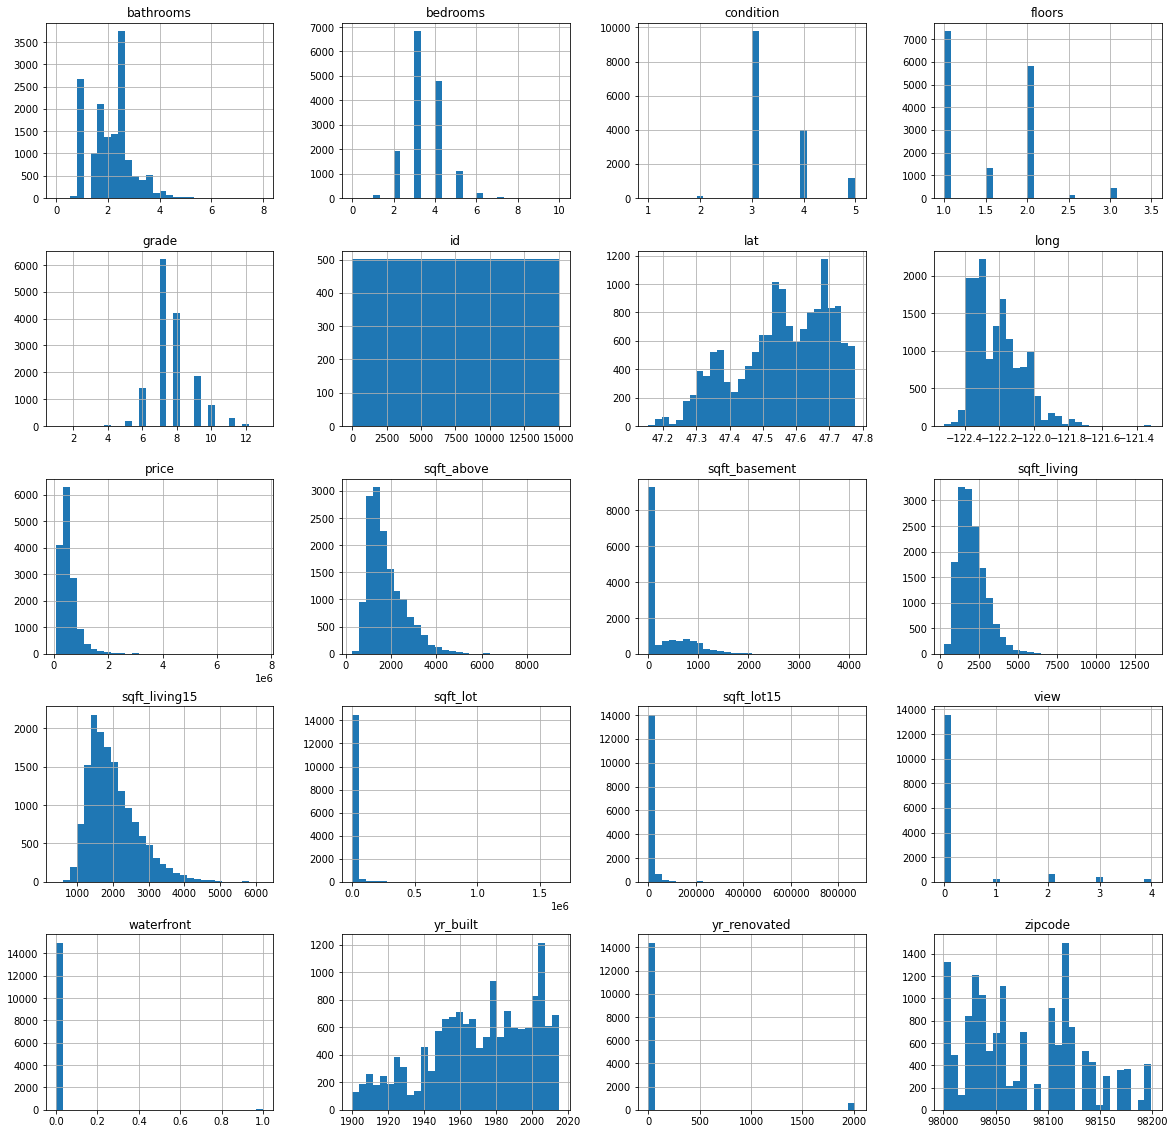

In [ ]:
housing.hist(figsize=(20,20), bins=30)

((array([-3.91024552, -3.69050911, -3.57011438, ...,  3.57011438,
          3.69050911,  3.91024552]),
  array([  78000.,   80000.,   81000., ..., 6885000., 7062500., 7700000.])),
 (311259.39937053947, 540682.653142667, 0.8376098994462499))

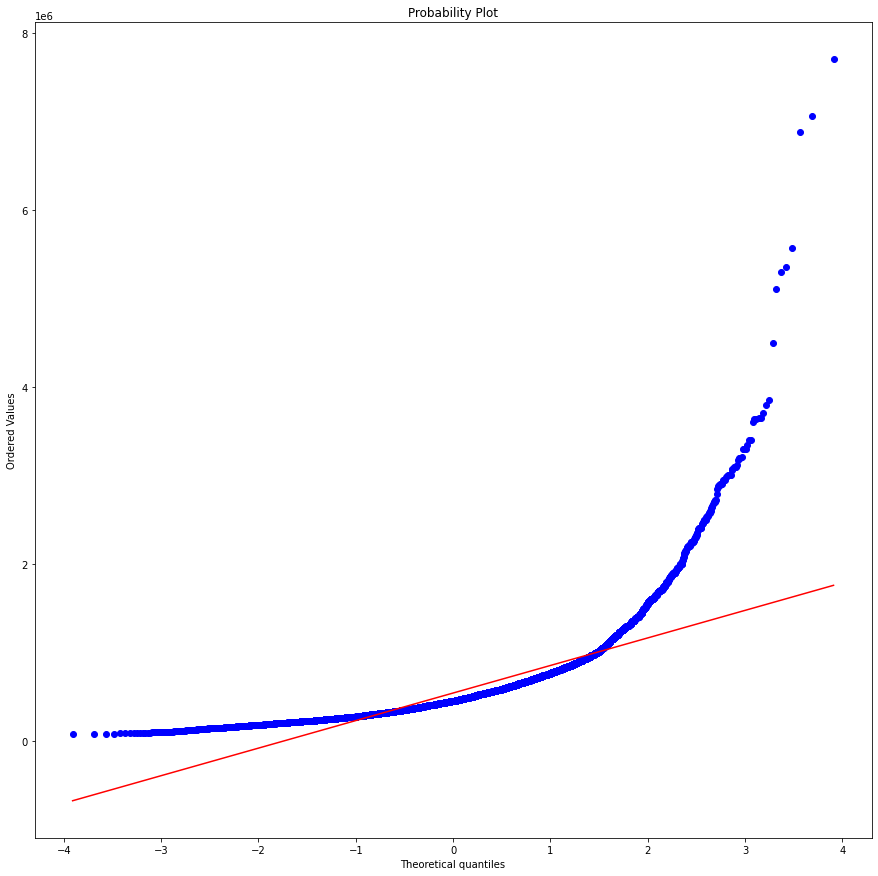

In [ ]:
from scipy import stats
plt.figure(figsize=(15,15))
stats.probplot(housing['price'], plot=plt)

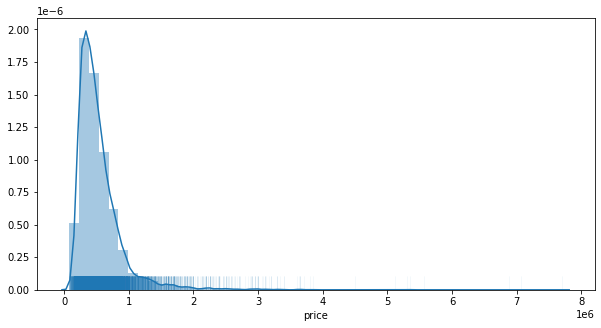

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(housing['price'], rug=True, rug_kws={'alpha': 0.05})

In [ ]:
housing['log_price'] = np.log(housing['price'])

from scipy import stats
plt.figure(figsize=(10,8))
stats.probplot(housing['log_price'], plot=plt)
plt.show()

In [ ]:
columns = housing.corr()['price'].abs().sort_values(ascending=False)[:11].index
columns


Index(['price', 'log_price', 'sqft_living', 'grade', 'sqft_above',
       'sqft_living15', 'bathrooms', 'view', 'bedrooms', 'sqft_basement',
       'lat'],
      dtype='object')

In [ ]:
new_housing = housing[columns]
new_housing

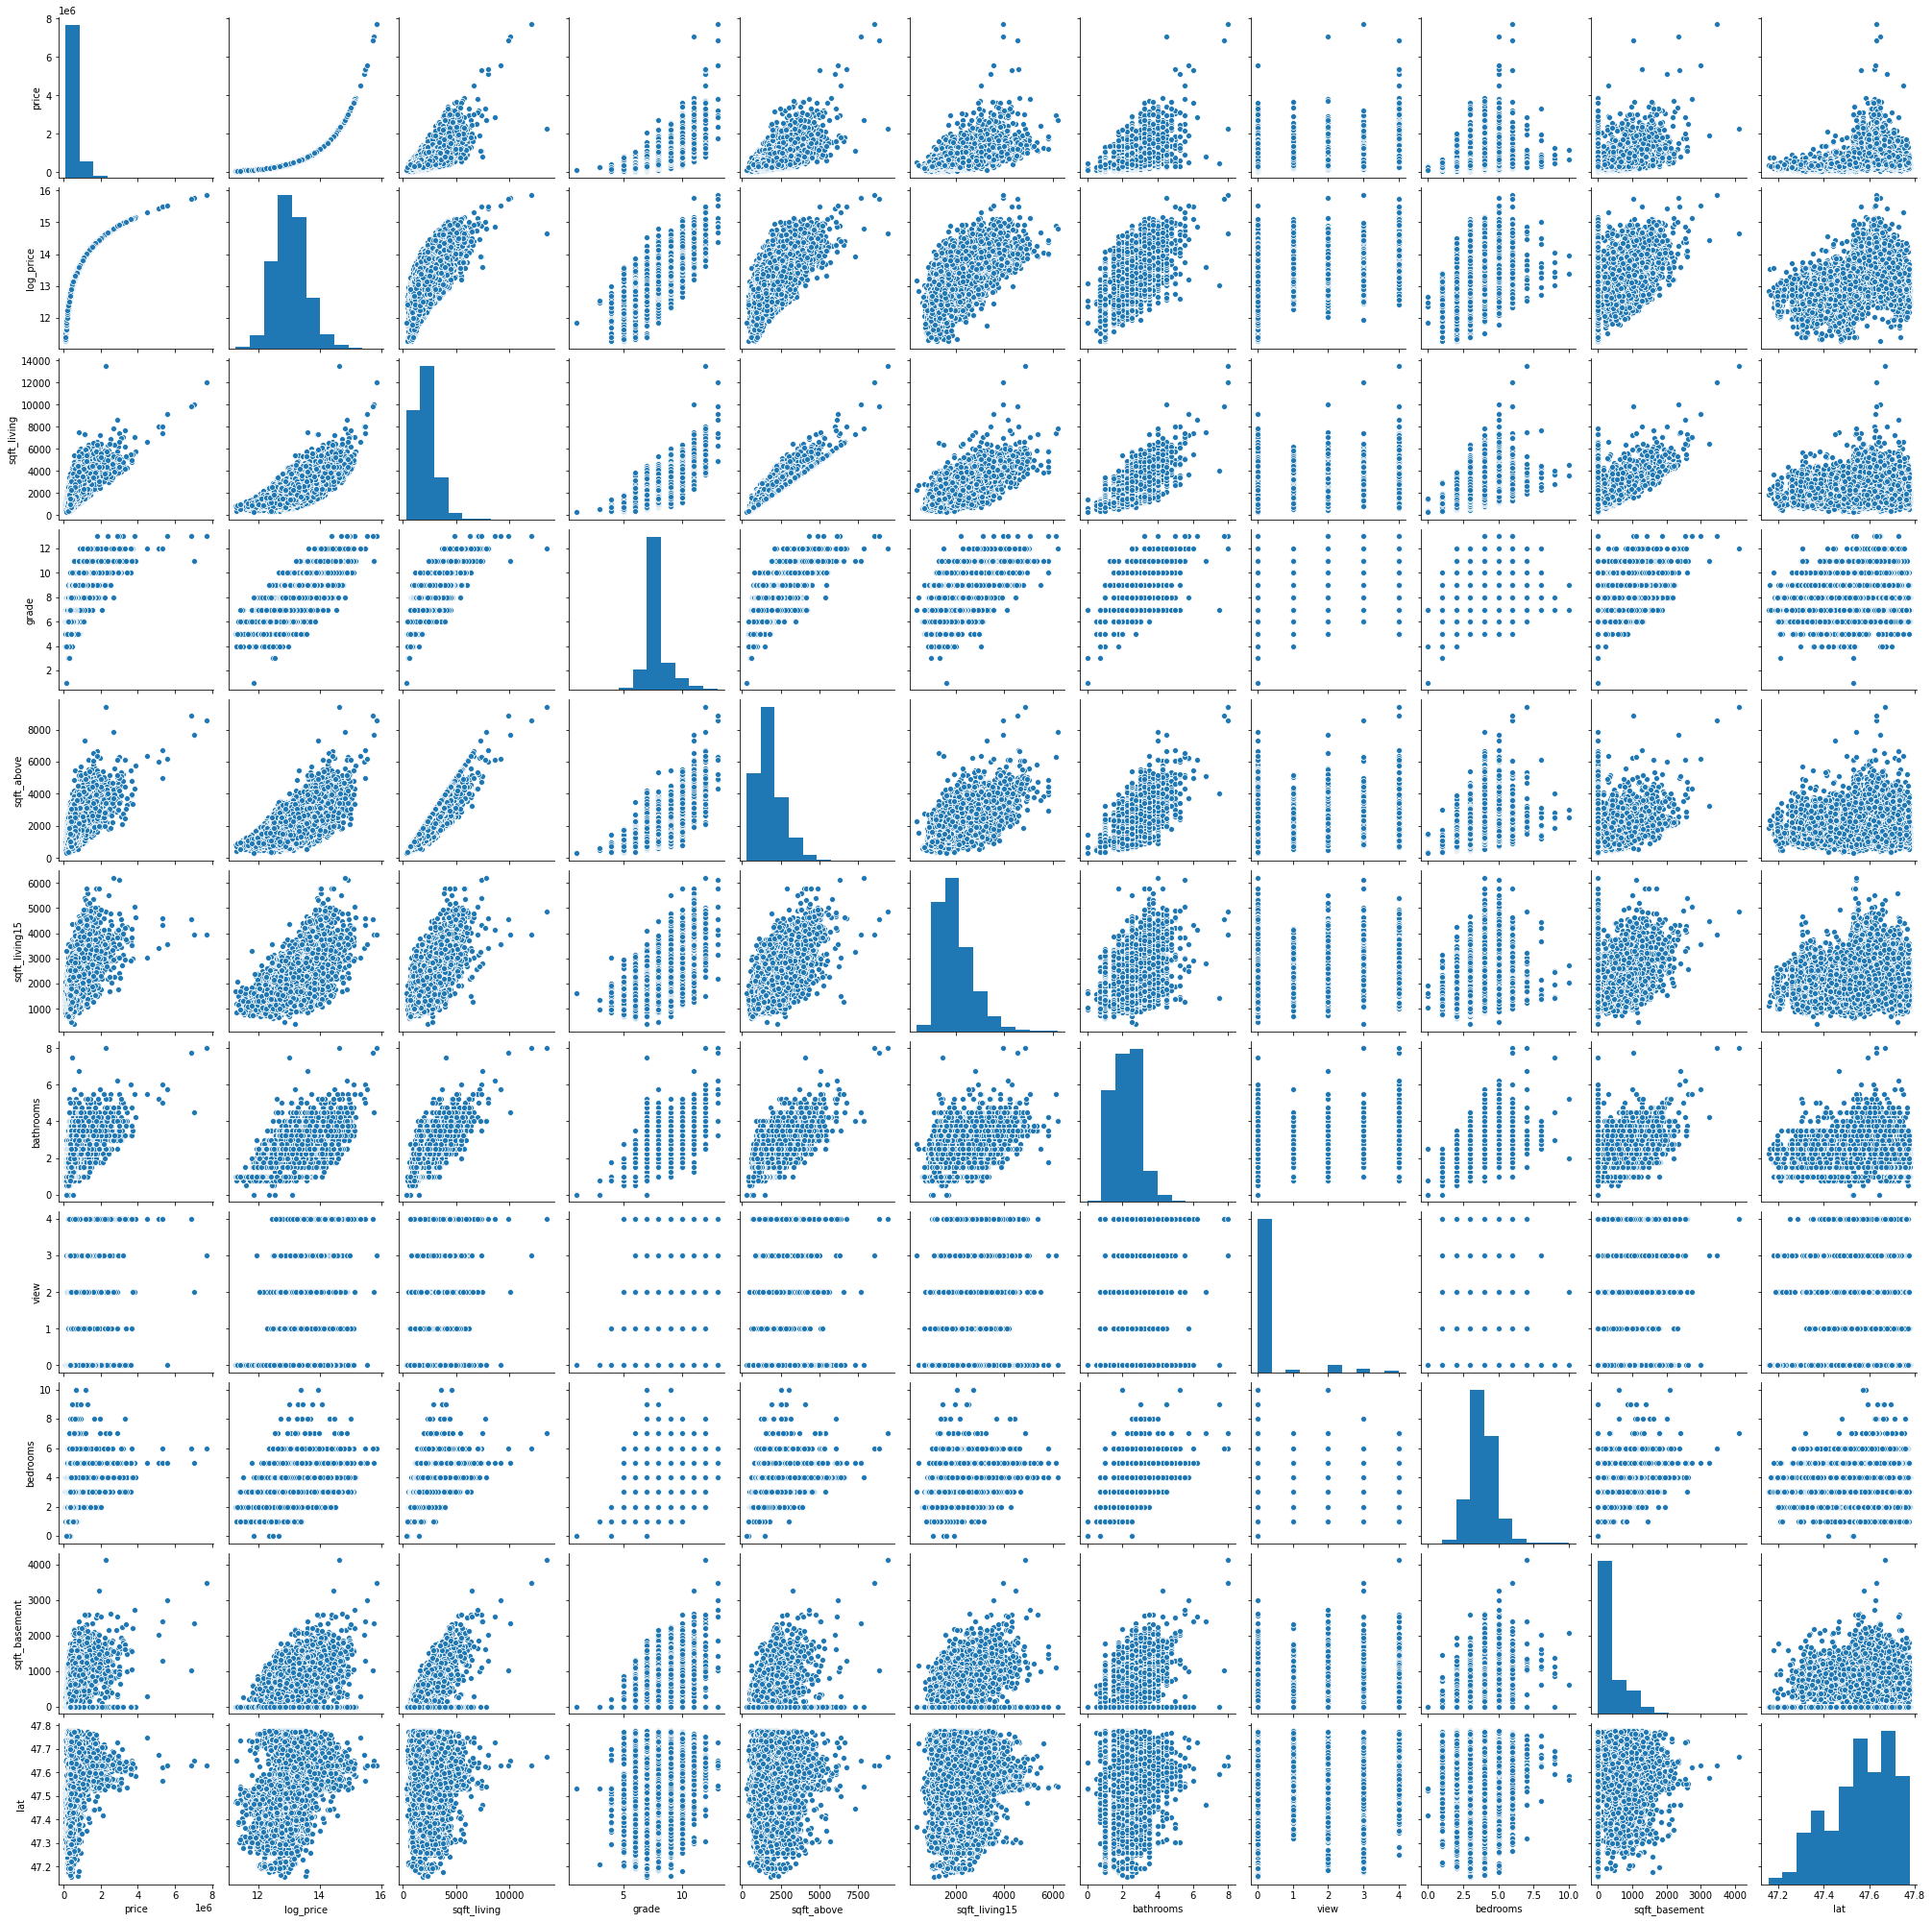

In [ ]:
sns.pairplot(new_housing)

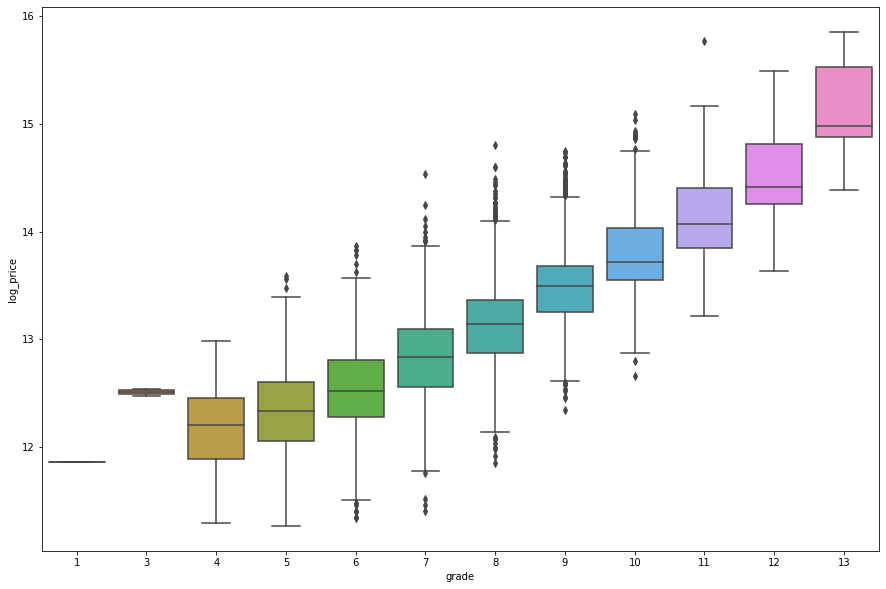

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot('grade','log_price', data=new_housing)

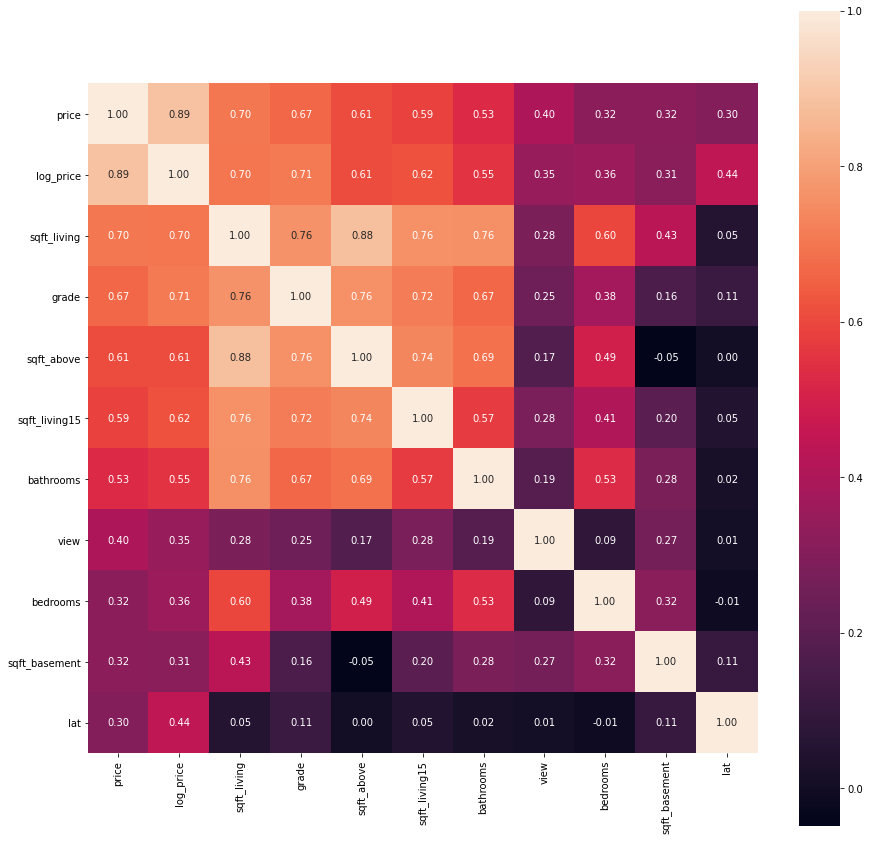

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(housing[columns].corr(), square=True, fmt=".2f",annot=True)

In [9]:
housing['grade'].value_counts().sort_index()

1        1
3        2
4       23
5      174
6     1406
7     6228
8     4207
9     1855
10     781
11     288
12      61
13       9
Name: grade, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [ ]:
housing['grade_transformed'] = housing['grade']

housing.loc[
            housing['grade_transformed']<=3, 
            'grade_transformed'
            ] = 3

In [ ]:
housing['grade_transformed'].value_counts()

7     6228
8     4207
9     1855
6     1406
10     781
11     288
5      174
12      61
4       23
13       9
3        3
Name: grade_transformed, dtype: int64

In [ ]:
X = housing.drop('price', axis=1,)
y = housing['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25, stratify=X['grade_transformed'])


In [11]:
X_train.shape, X_test.shape

NameError: ignored

In [ ]:
|